In [18]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder


In [3]:
# Reading in the CSV
data = pd.read_csv('CVD_cleaned.csv')

# Displaying first few rows to make sure data read in
data.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
# Get general information about the dataset
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [8]:
# Basic statistics of the dataset
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
# Exploring unique values
unique_values = data.nunique()
print(unique_values)

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64


In [12]:
# Encoding Categorical Variables using One-hot encoding-convert categories to numerical format for machine learning algorithim
data = pd.get_dummies(data, columns=['General_Health', 'Sex', 'Age_Category'])


In [14]:
#Standardize numerical features: Height_(cm), Weight_(kg) and BMI

scaler = StandardScaler()
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


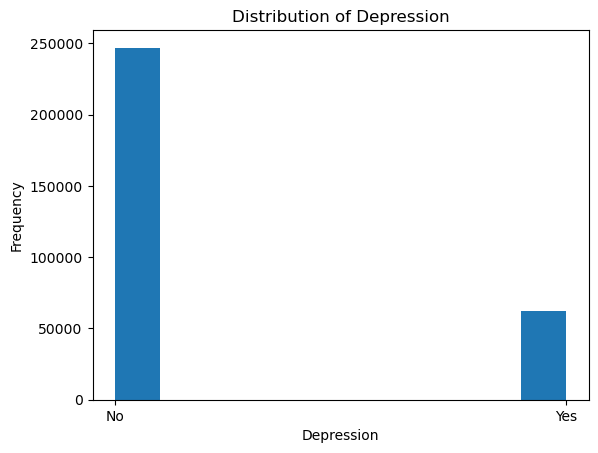

In [16]:
#Visualizing Feature Distributions

# Distribution of Smoking
plt.hist(data['Depression'], bins=10)
plt.xlabel('Depression')
plt.ylabel('Frequency')
plt.title('Distribution of Depression')
plt.show()

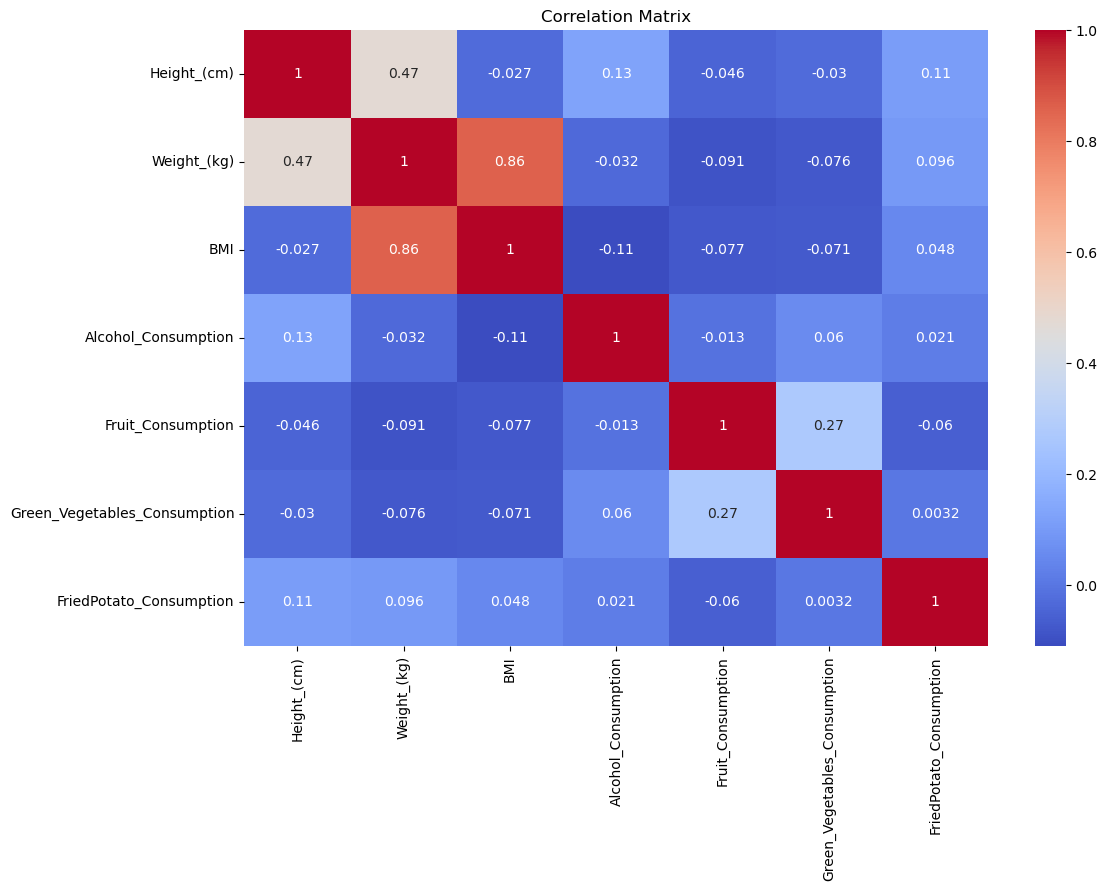

In [18]:
# Correlation matrix
numeric_data = data.select_dtypes(include=[np.number]) # Selecting numeric columns
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
#Start of Karlee's Cells
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load dataset
df = pd.read_csv("CVD_cleaned.csv")

In [8]:
# Define target variable and features
target = 'Depression'  # Update if your actual target column has a different name
X = df.drop(columns=[target])
y = df[target]

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Transform using the same encoder
    label_encoders[col] = le  # Store encoders for future reference

# Now, apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Random Forest Accuracy: 0.81


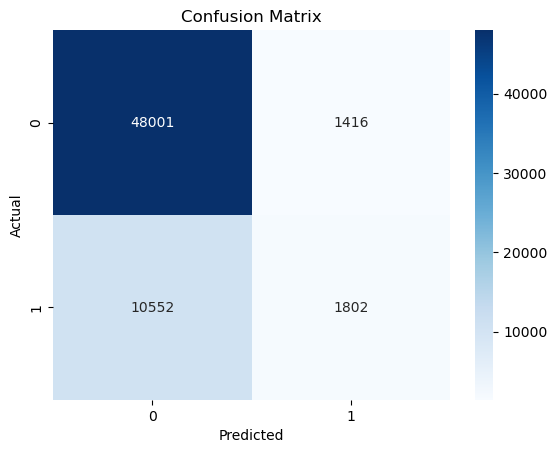

In [17]:
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

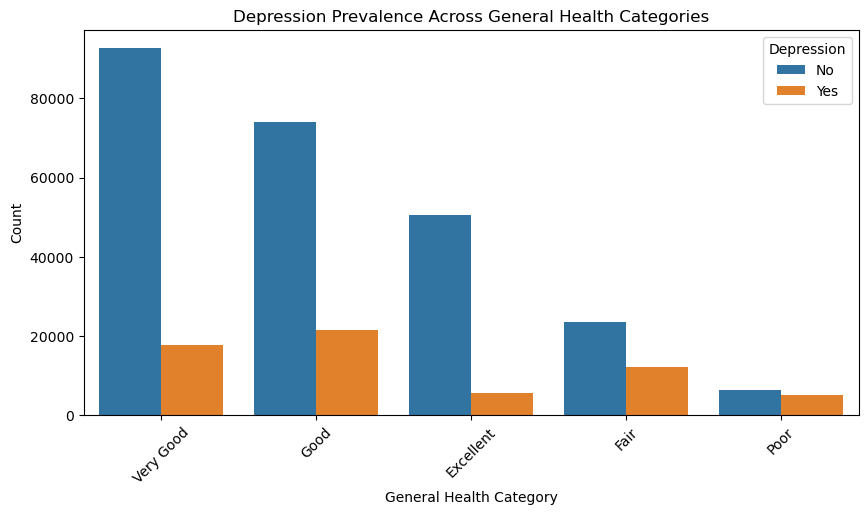

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='General_Health', hue='Depression', order=df['General_Health'].value_counts().index)
plt.xlabel("General Health Category")
plt.ylabel("Count")
plt.title("Depression Prevalence Across General Health Categories")
plt.xticks(rotation=45)
plt.legend(title="Depression")
plt.show()

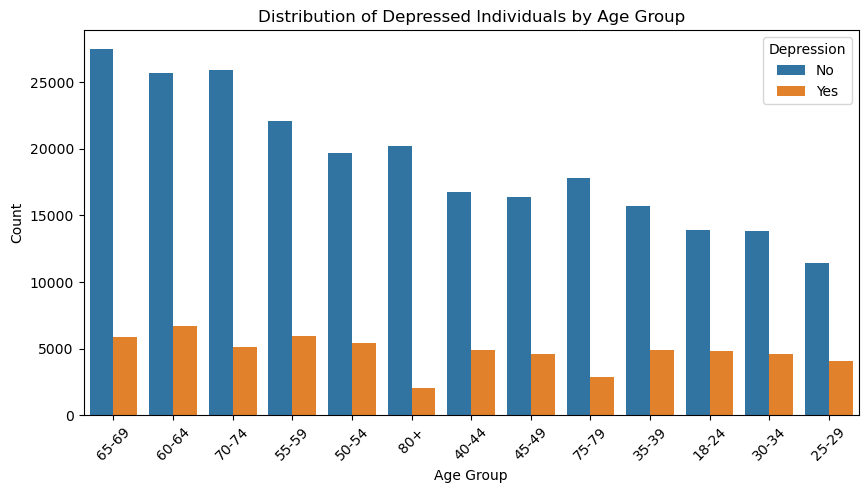

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Age_Category', hue='Depression', order=df['Age_Category'].value_counts().index)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Depressed Individuals by Age Group")
plt.xticks(rotation=45)
plt.legend(title="Depression")
plt.show()


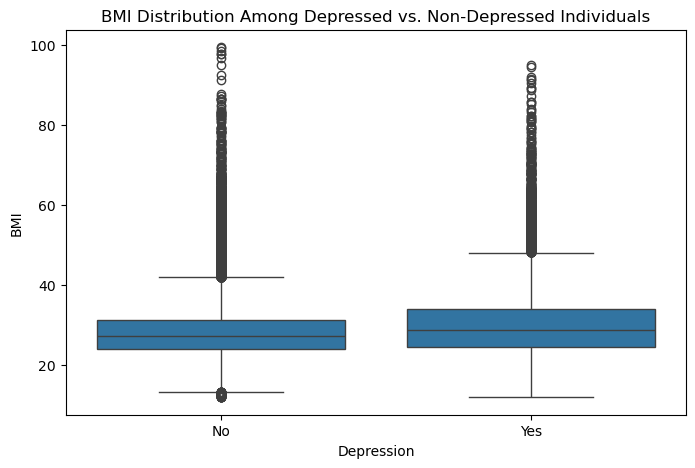

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Depression', y='BMI', data=df)
plt.xlabel("Depression")
plt.ylabel("BMI")
plt.title("BMI Distribution Among Depressed vs. Non-Depressed Individuals")
plt.show()

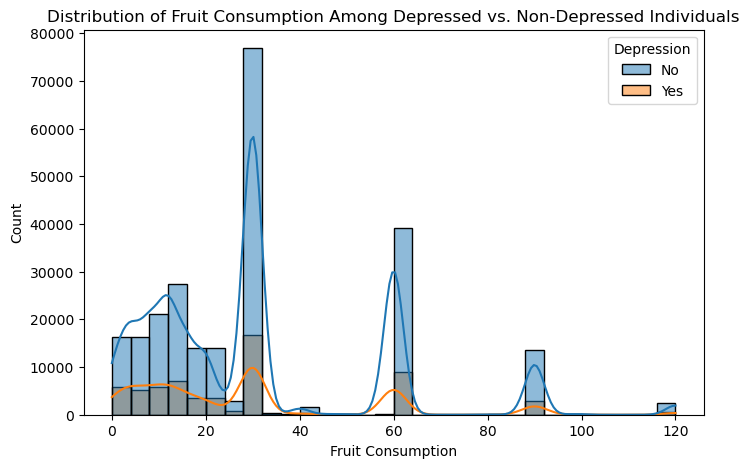

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Fruit_Consumption', hue='Depression', kde=True, bins=30)
plt.xlabel("Fruit Consumption")
plt.ylabel("Count")
plt.title("Distribution of Fruit Consumption Among Depressed vs. Non-Depressed Individuals")
plt.show()

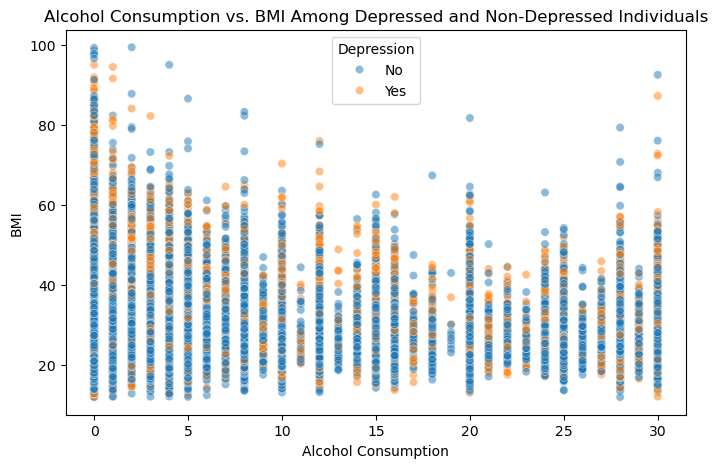

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Alcohol_Consumption', y='BMI', hue='Depression', alpha=0.5)
plt.xlabel("Alcohol Consumption")
plt.ylabel("BMI")
plt.title("Alcohol Consumption vs. BMI Among Depressed and Non-Depressed Individuals")
plt.show()

/var/folders/r8/sn7jg83x7kx03sxgw1zbwxn80000gn/T/ipykernel_75085/2305737748.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Smoking_History', y='Alcohol_Consumption', hue='Depression', ci=None)


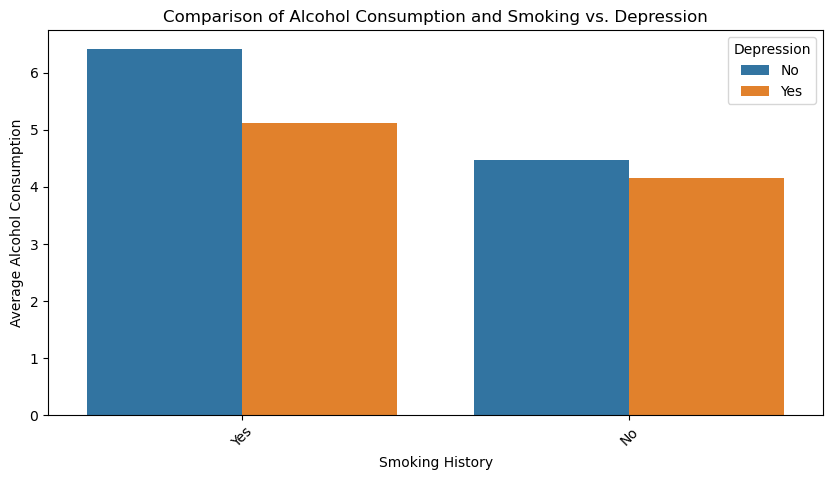

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Smoking_History', y='Alcohol_Consumption', hue='Depression', ci=None)
plt.xlabel("Smoking History")
plt.ylabel("Average Alcohol Consumption")
plt.title("Comparison of Alcohol Consumption and Smoking vs. Depression")
plt.xticks(rotation=45)
plt.legend(title="Depression")
plt.show()

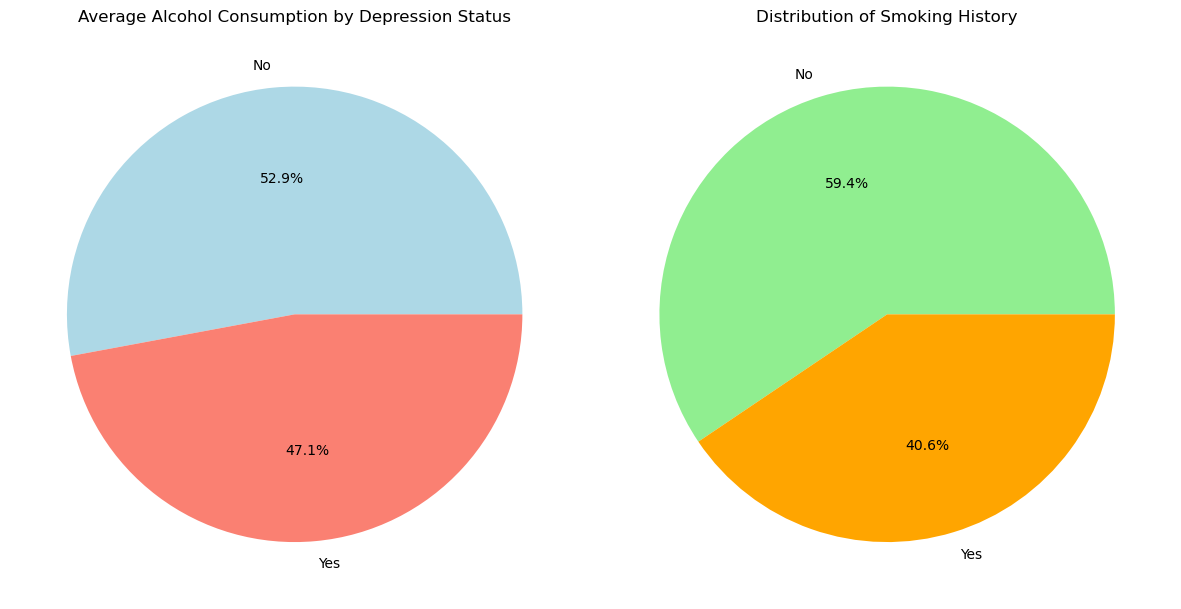

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Alcohol Consumption Pie Chart
alcohol_counts = df.groupby('Depression')['Alcohol_Consumption'].mean()
axes[0].pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[0].set_title("Average Alcohol Consumption by Depression Status")

# Smoking History Pie Chart
smoking_counts = df['Smoking_History'].value_counts()
axes[1].pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'orange', 'purple', 'red', 'blue'])
axes[1].set_title("Distribution of Smoking History")

plt.tight_layout()
plt.show()

In [19]:
# Amadou code here
# Define target column (update 'target_column' to match your dataset)
target_column = "Depression"  # Example: 'price', 'label', 'species', etc.

# Separate features (X) and target (y)
X = data.drop(columns=[target_column])  # Drop target column to get features
y = data[target_column]  # Target variable


categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


# Select top 2 features
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)

# Get selected feature names+
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Exercise', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'BMI', 'Smoking_History']


BMI                             0.149469
Weight_(kg)                     0.123153
Fruit_Consumption               0.092119
FriedPotato_Consumption         0.092097
Green_Vegetables_Consumption    0.092042
Age_Category                    0.090554
Height_(cm)                     0.090110
Alcohol_Consumption             0.074409
General_Health                  0.049625
Checkup                         0.027017
dtype: float64


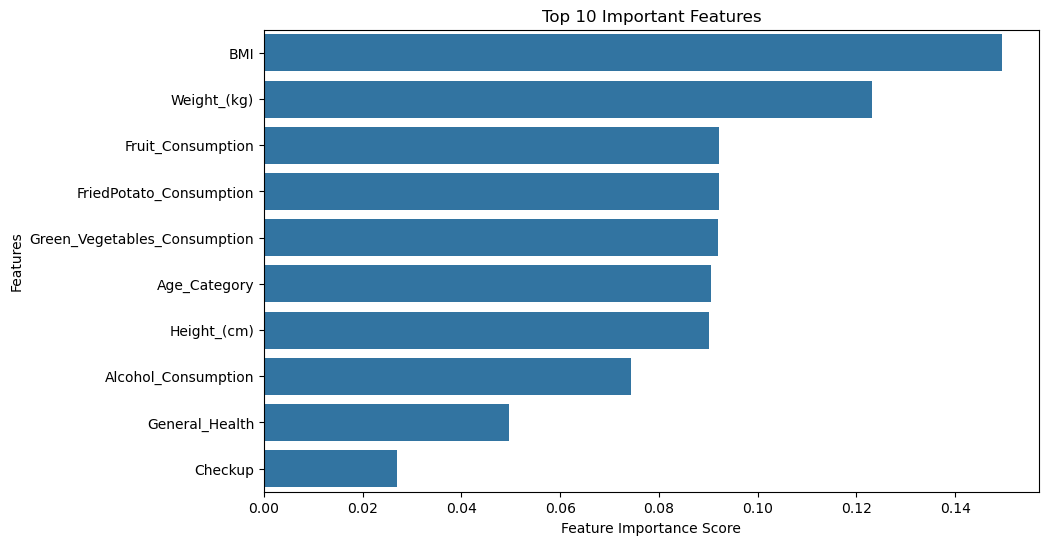

In [20]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Display important features
print(importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()